In [113]:
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8,6
import pandas as pd
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### Проверяем корреляцию средней оценки экшн\научной фантастики с ее бюджетом

Сначала подготавливаем данные, оставляем только нужные колонки, genres представлена в виде строк, проверяем строку на содержание "Science Fiction" и "Action".
Используем sns.joint_plot для визуализации соотношения двух численных переменных, бюджета и средней оценки.


In [114]:
dataset = pd.read_csv('tmdb_5000_movies.csv').dropna()

In [115]:
dataset.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [116]:
useful_cols = ["budget", "genres", "vote_average"]

In [117]:
data = dataset[useful_cols]

In [118]:
data_for_action_SF = data[data['genres'].str.contains("Action") & data['genres'].str.contains("Science Fiction")]

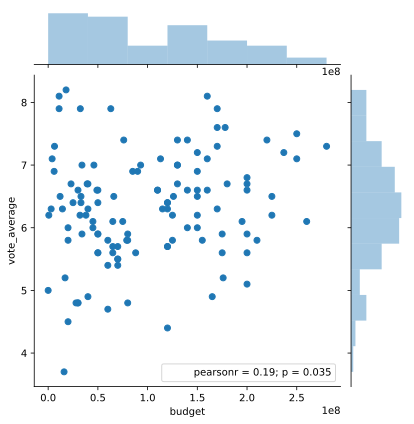

In [119]:
sns.jointplot(x='budget', y='vote_average', data=data_for_action_SF, kind='scatter')

In [120]:
'''Не уверен, накосялил ли с данными, или большое количество старой (читай, более дешевой) фантастики
сильно увеличило кол-во фильмов с низким бюджетом и высокой оценкой'''

'Не уверен, накосялил ли с данными, или большое количество старой (читай, более дешевой) фантастики\nсильно увеличило кол-во фильмов с низким бюджетом и высокой оценкой'

## Сравним распределение оценок уже рассмотренной нами категории и, к примеру, Action\Drama.
Используем гистограммы matplotlib.pyplot, наглядно показывающие распределение.

In [121]:
data_for_action_drama = data[data['genres'].str.contains("Action") & data['genres'].str.contains("Drama")]

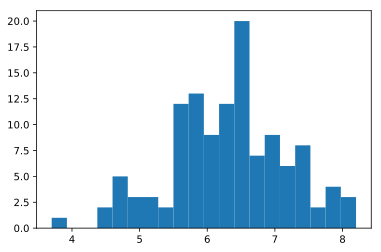

In [122]:
plt.hist(data_for_action_SF["vote_average"], bins = 20 )

plt.show()


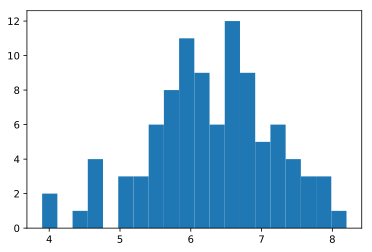

In [123]:
plt.hist(data_for_action_drama["vote_average"], bins = 20 )
plt.show()

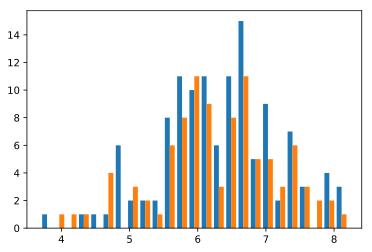

In [124]:
data = data_for_action_SF["vote_average"], data_for_action_drama["vote_average"]
pyplot.hist(data, bins= 25,)
plt.show()

In [125]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

## Проанализируем, как средний бюджет меняется со временем
Используем plotly для отображения 

In [126]:
useful_cols = ['release_date', 'budget']

In [127]:
data = dataset[useful_cols]

In [128]:
pd.options.mode.chained_assignment = None 
data['release_date'] = pd.to_datetime(data['release_date'])

In [129]:
data.sort_values(by='release_date', inplace= True)

In [130]:
data.head(1)

,release_date,budget
4259,1937-12-20,1488423


In [131]:
data.tail(1)

,release_date,budget
4255,2017-02-03,0


In [132]:
data['release_date'] = data['release_date'].astype('datetime64[ns]')
data['year'] = data['release_date'].dt.year
data.head()

,release_date,budget,year
4259,1937-12-20,1488423,1937
3986,1939-08-15,2777000,1939
4050,1940-11-13,2280000,1940
4441,1942-08-14,858000,1942
4339,1962-10-04,950000,1962


In [133]:
trace0 = go.Scatter(x = data.year, y = data.budget,  mode = 'lines')
layout = {'title': 'Statistics of movie budget'}
fig = go.Figure(data=[trace0], layout=layout)

iplot(fig, show_link = False)

## Рассмотрим корреляцию бюджета и дохода.

Для наглядности используем stacked bar.

In [134]:
useful_cols = ['budget', 'revenue']

In [135]:
data = dataset[useful_cols]



In [136]:
data.head(1)

,budget,revenue
0,237000000,2787965087


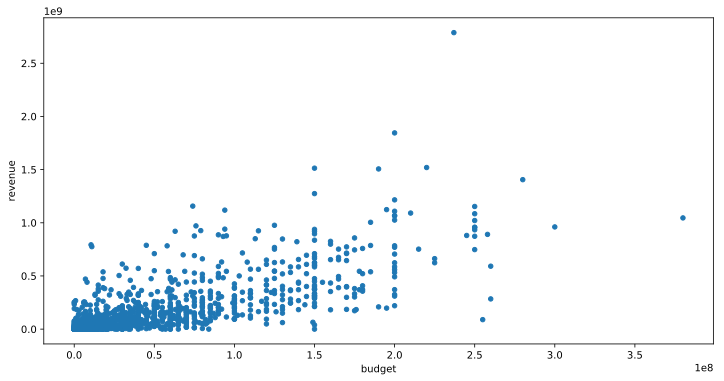

In [137]:
data.plot.scatter(x = 'budget', y = 'revenue', figsize=(12,6)) 



## Посмотрим, влияет ли бюджет фильма на количество поставленных оценок и их распределение
Для отображения трех переменных хорошо подходит bubble chart

In [138]:
useful_cols = ["budget", "vote_average", 'vote_count']

In [139]:
data = dataset[useful_cols]

In [140]:
data.head(1)

,budget,vote_average,vote_count
0,237000000,7.2,11800


In [141]:
trace0 = go.Scatter(
    x=data.budget,
    y=data.vote_average,
    mode = 'markers+text',
    marker = dict(
    size = 1/200*data.vote_count))

layout = {
    'title': 'Статистика по бюджету, оценкам и их количеству',
    'xaxis': {'title': 'Бюджет'},
    'yaxis': {'title': 'Оценки'}}
viz_data = [trace0]

fig = go.Figure(data = viz_data, layout = layout)

iplot(fig, show_link=False)